# K-means 알고리즘으로 붓꽃 품종 구분하기

In [22]:
from sklearn.datasets import load_iris
iris = load_iris() 

import pandas as pd 

In [23]:
from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                                'petal_length', 'petal_width'])
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [25]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

# silhouette 계수 측정

In [28]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouette_coeff']=score_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [29]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

# 실루엣 차트

In [30]:
import matplotlib.pyplot as plt

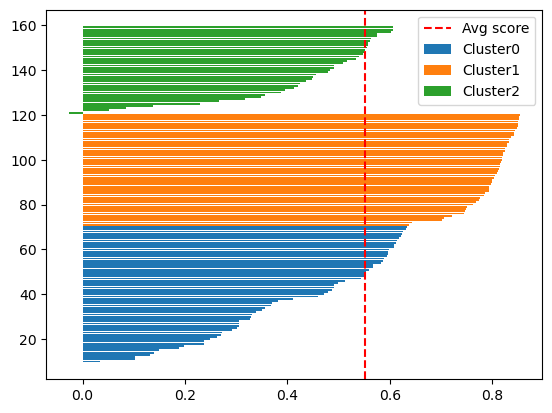

In [31]:
y_lower = 10
for i in range(3):
    cluster_i = score_samples[iris_df['cluster']==i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
    y_lower = y_upper
    
avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg score')
plt.legend()
plt.show()

# Scree plot

In [32]:
KM.inertia_

78.85566582597728

In [33]:
scree_df = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

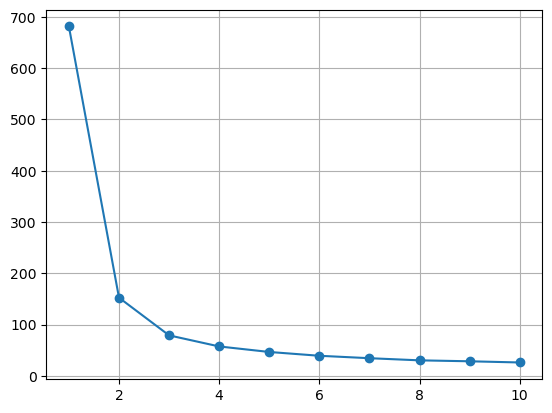

In [34]:
inertia = []
k_values = range(1,11)
for k in k_values:
    Kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    Kmeans.fit(scree_df)
    inertia.append(Kmeans.inertia_)
    
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

# PCA > 2개의 주성분으로 축소 

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [37]:
iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


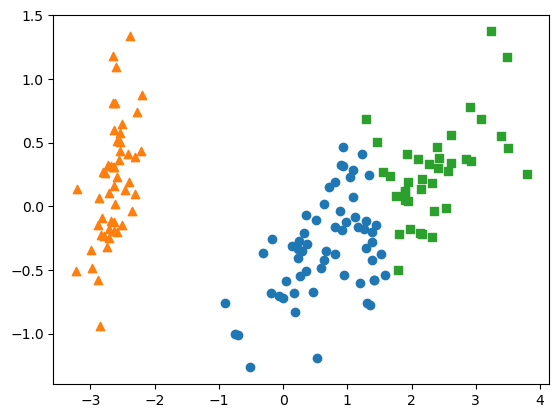

In [46]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='^')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='s')

# StandardScaler 로 스케일링
# PCA 2개로 축소
# 시각화

In [49]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [ ]:
scaler = StandardScaler()
scaler.fit(pca)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca_scaled.explained_v

# 클러스터링 실습 

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [91]:
# pca 2개의 주성분, ... 그이상 주성분 추출
# explained_variance_ratio_ 이 가장 높은 주성분의 갯수
# kmeans data=pca1, pca2, cluster=2

In [93]:
# pca 2개의 주성분 
pca1 = PCA(n_components=2)
X_pca = pca1.fit_transform(cancer.data)
X_pca[:2]
df_1 = pd.DataFrame(X_pca, columns=['ftr1','ftr2'])

In [95]:
pca1.components_.shape

(2, 30)

In [97]:
pca1.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [99]:
KM1 = KMeans(n_clusters=2,  random_state=42)
KM1_labels = KM1.fit_predict(X_pca)
df_1['KM1_label'] = KM1_labels

print("KMeans Silhouette Score:", silhouette_score(X_pca, KM1_labels))

KMeans Silhouette Score: 0.6984195775999954


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [100]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [108]:
df_1['c_pca_x'] = X_scaled[:,0]
df_1['c_pca_y'] = X_scaled[:,1]
#cancer_df['c_pca_z'] = pca_transformed1[:,2]
df_1['cluster'] = KM1.labels_

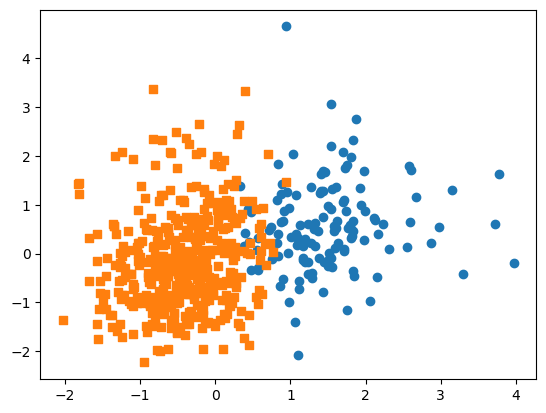

In [109]:
plt.scatter(x=df_1.loc[df_1['cluster']==0, 'c_pca_x'],
            y=df_1.loc[df_1['cluster']==0, 'c_pca_y'], marker='o')
plt.scatter(x=df_1.loc[df_1['cluster']==1, 'c_pca_x'],
            y=df_1.loc[df_1['cluster']==1, 'c_pca_y'], marker='s')

In [101]:
from sklearn.decomposition import PCA

# PCA 모델 a생성 - 주성분 2개
pca_2 = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca_2.fit(X_scaled)

# 데이터 변환(PCA 적용)
X_pca_2 = pca_2.transform(X_scaled)

In [103]:
import numpy as np
pca_3 = PCA(n_components=5)
pca_3.fit(X_scaled)
print(np.round(pca_3.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_3.explained_variance_ratio_), 3))

[0.443 0.19  0.094 0.066 0.055]
[0.443 0.632 0.726 0.792 0.847]


In [104]:
pca_4 = PCA(n_components=7)
pca_4.fit(X_scaled)
print(np.round(pca_4.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_4.explained_variance_ratio_), 3))

[0.443 0.19  0.094 0.066 0.055 0.04  0.023]
[0.443 0.632 0.726 0.792 0.847 0.888 0.91 ]


# 9개 주성분으로 kmeans 클러스터링

In [114]:
# 데이터 변환(PCA 적용)
pca_5 = PCA(n_components=9)
pca_5.fit(X_scaled)
X_pca_5 = pca_5.transform(X_scaled)
X_pca_5.shape

(569, 9)

In [117]:
df_2 = pd.DataFrame(X_pca_5, columns=['ftr1', 'ftr2',
                                      'ftr3', 'ftr4',
                                      'ftr5', 'ftr6',
                                      'ftr7', 'ftr8'
                                      'ftr9','ftr10'])
df_2[:3]

,ftr1,ftr2,ftr3,ftr4,ftr5,ftr6,ftr7,ftr8ftr9,ftr10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398406,-0.157117
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097372,0.024064


In [120]:
print(np.round(pca_5.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_5.explained_variance_ratio_), 3))

[0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014]
[0.443 0.632 0.726 0.792 0.847 0.888 0.91  0.926 0.94 ]


In [121]:
kmeans_2 = KMeans(n_clusters=2, random_state=152)
kmeans_2_labels = kmeans_2.fit_predict(X_pca_5)

df_2['kmeans_label'] = kmeans_2_labels

print("KMeans Silhouette Score:", silhouette_score(X_pca_5, kmeans_2_labels))

KMeans Silhouette Score: 0.36014959496904947


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


주성분의 갯수, 누적비율, 실루엣계수<br>
주성분 : 9개<br>
누적 비율 : 0.94<br>
실루엣 계수 : 0.360<br>